<a href="https://colab.research.google.com/github/raghavendrak04/IIITS_PR_PROJECT/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___________________________________________________________________________________________________________________________________________________________________________________________
|--------------------------------------------------------------------------------------Initial Code--------------------------------------------------------------------------------------~|

   Source Port  Destination Port  NAT Source Port  NAT Destination Port  \
0        57222                53            54587                    53   
1        56258              3389            56258                  3389   
2         6881             50321            43265                 50321   
3        50553              3389            50553                  3389   
4        50002               443            45848                   443   

  Action  Bytes  Bytes Sent  Bytes Received  Packets  Elapsed Time (sec)  
0  Allow    177          94              83        2                  30  
1  Allow   4768       

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)



Printing all the ranks in sorted order :: 
[(100, 'Action'), (88, 'Destination Port'), (87, 'Bytes Sent'), (87, 'Bytes'), (79, 'NAT Source Port'), (79, 'NAT Destination Port'), (79, 'Elapsed Time (sec)'), (77, 'Packets'), (74, 'Bytes Received'), (61, 'Source Port')]

The 5 best features selected by this method are :
Destination Port
Bytes Sent
Bytes
NAT Source Port
NAT Destination Port

0    0
1    0
2    0
3    0
4    0
Name: Action, dtype: int64
Index([0, 1, 2, 3], dtype='int64')

___________________________________________________________________________________________________________________________________________________________________________________________
 Accuracy Percentage for test data by Random Forest model is :: 99.58493560397973%
___________________________________________________________________________________________________________________________________________________________________________________________


__________________________________________________

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


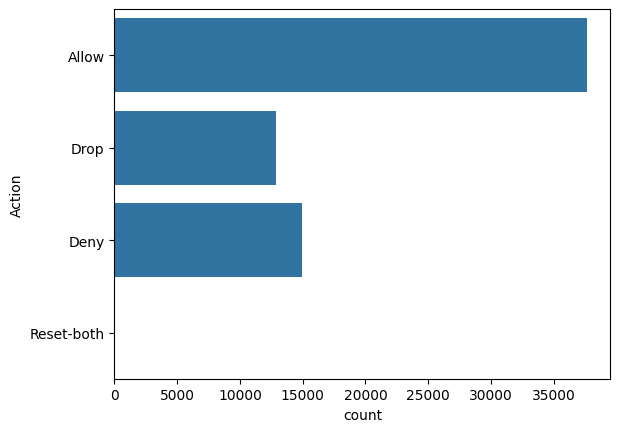

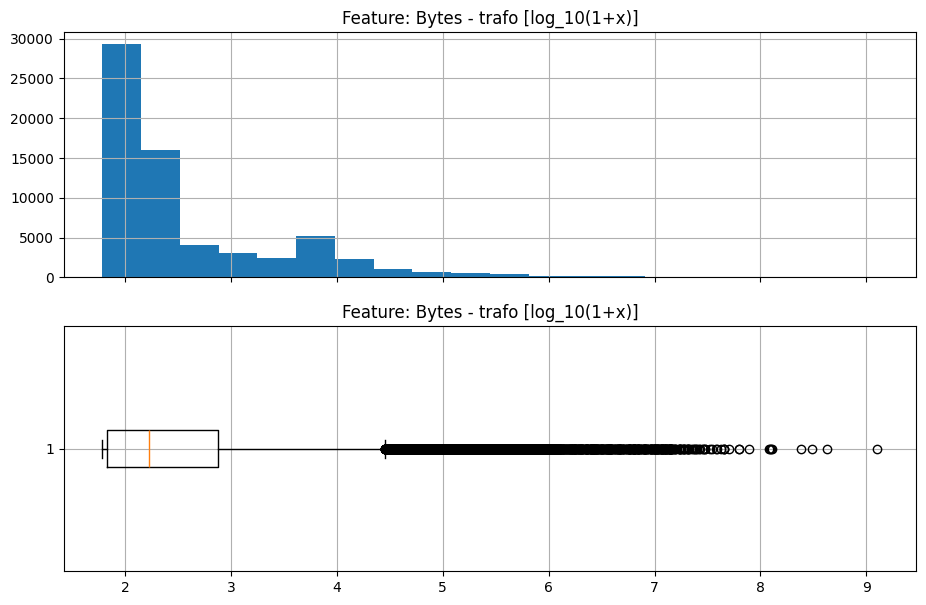

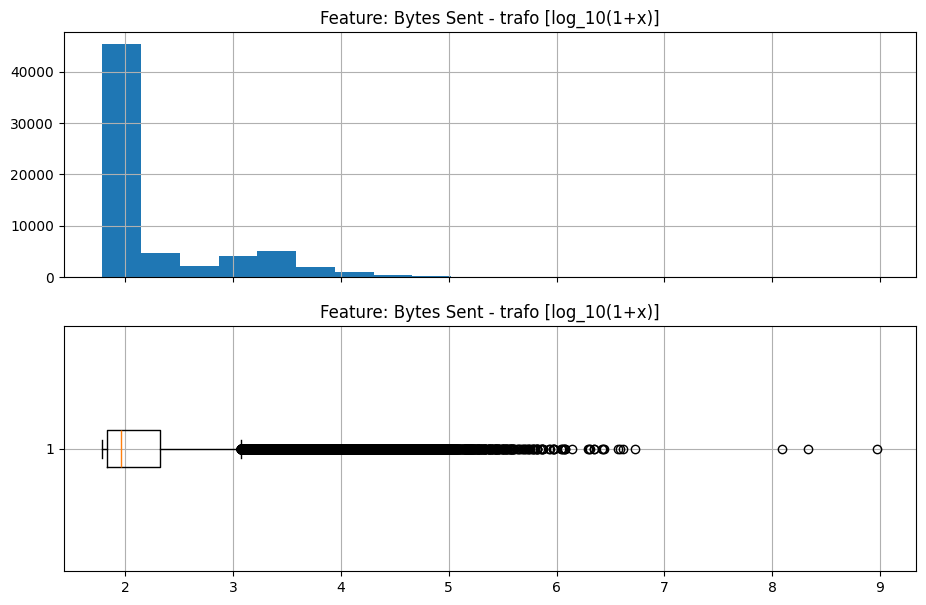

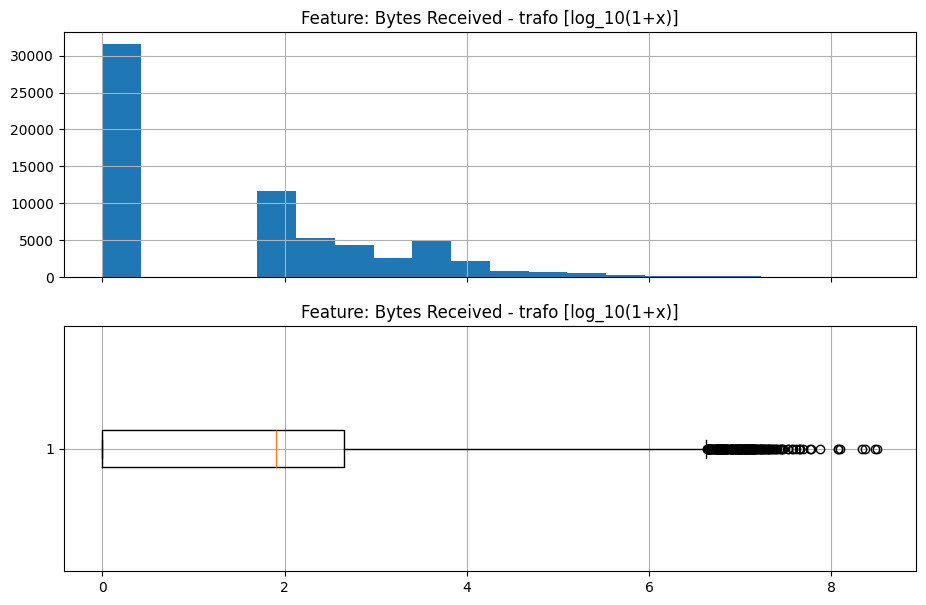

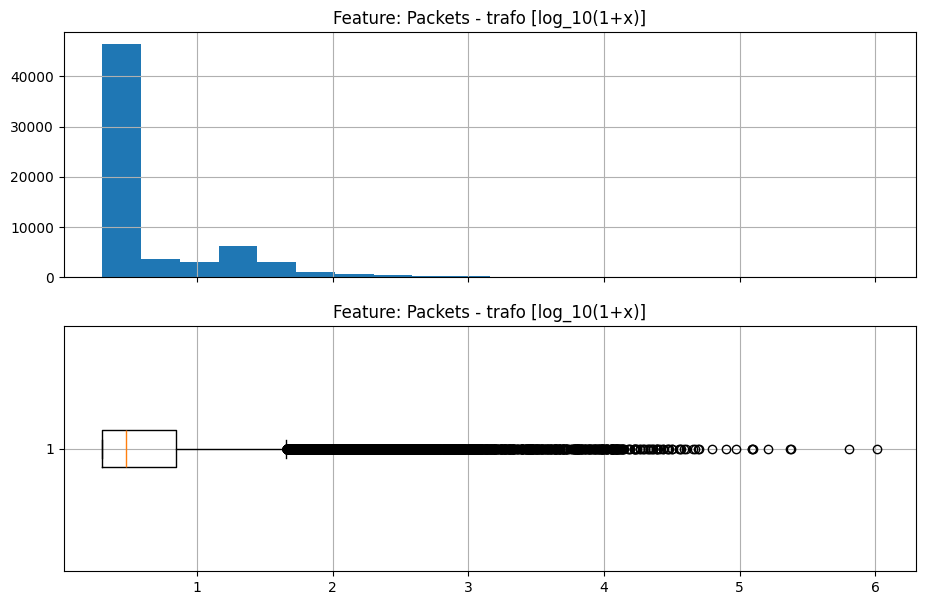

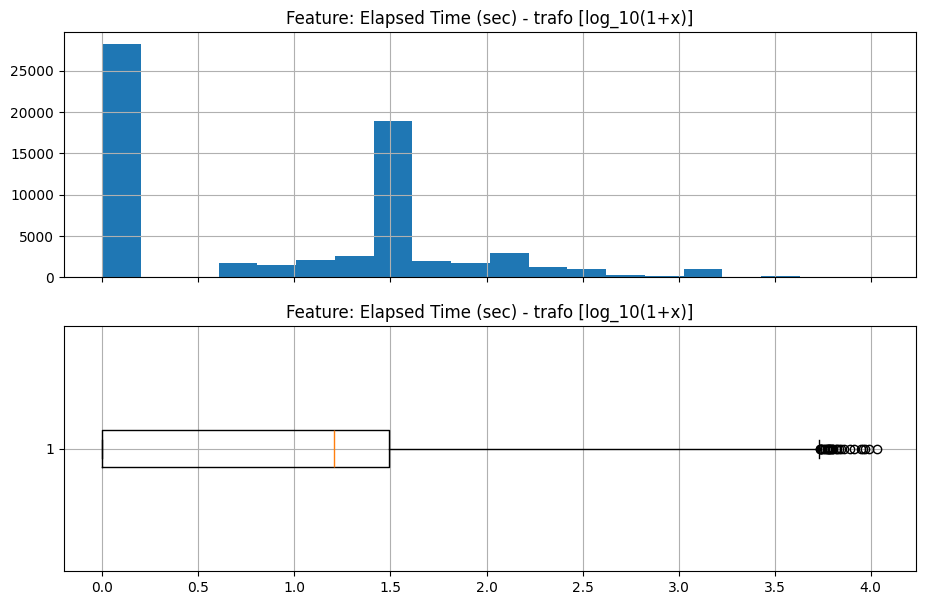

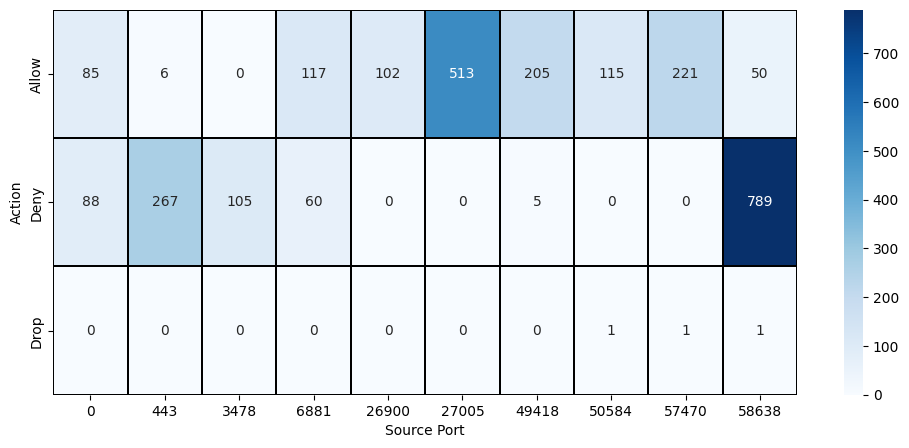

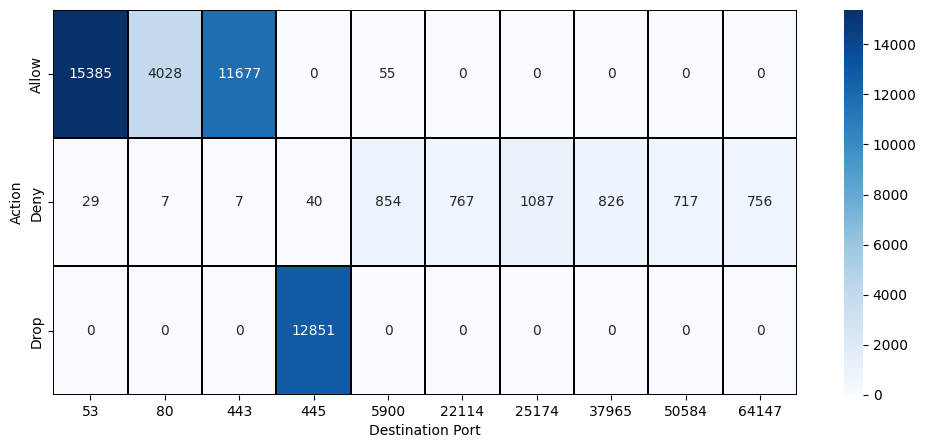

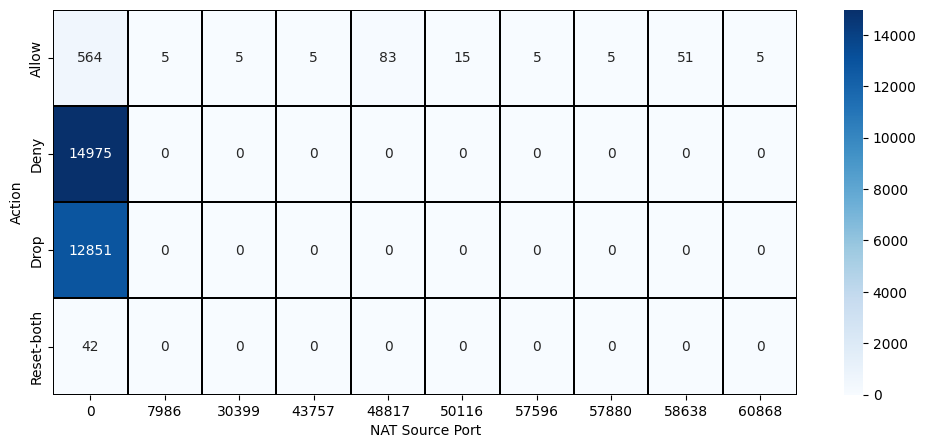

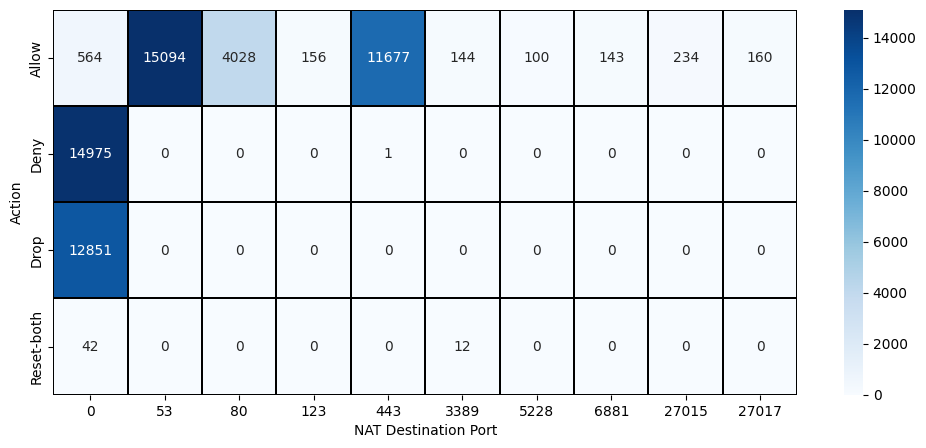

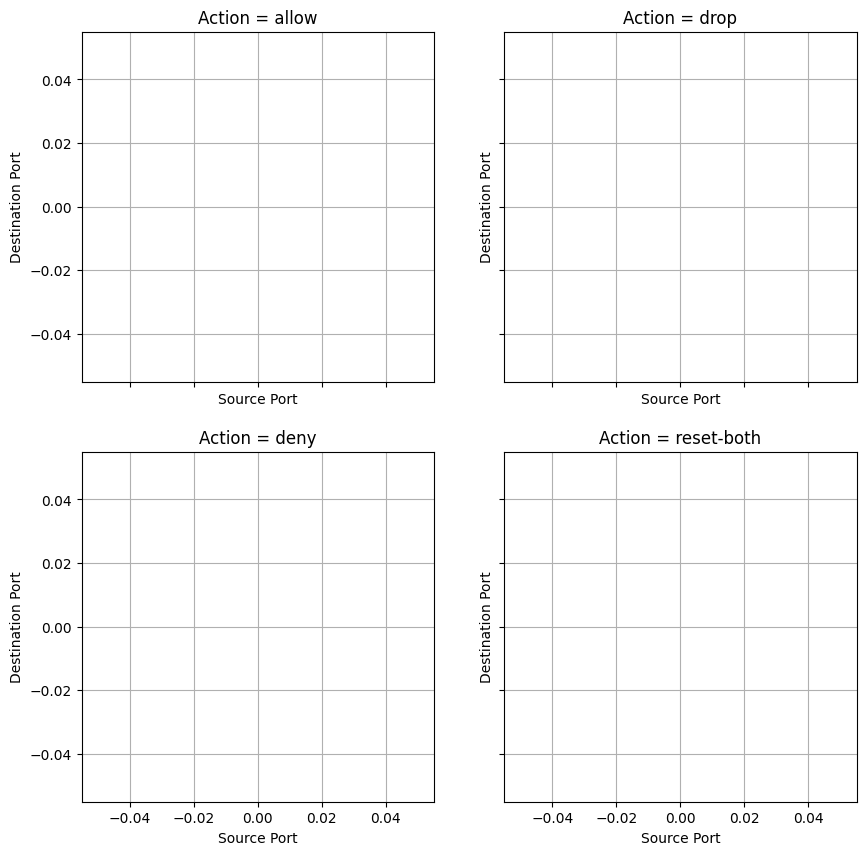

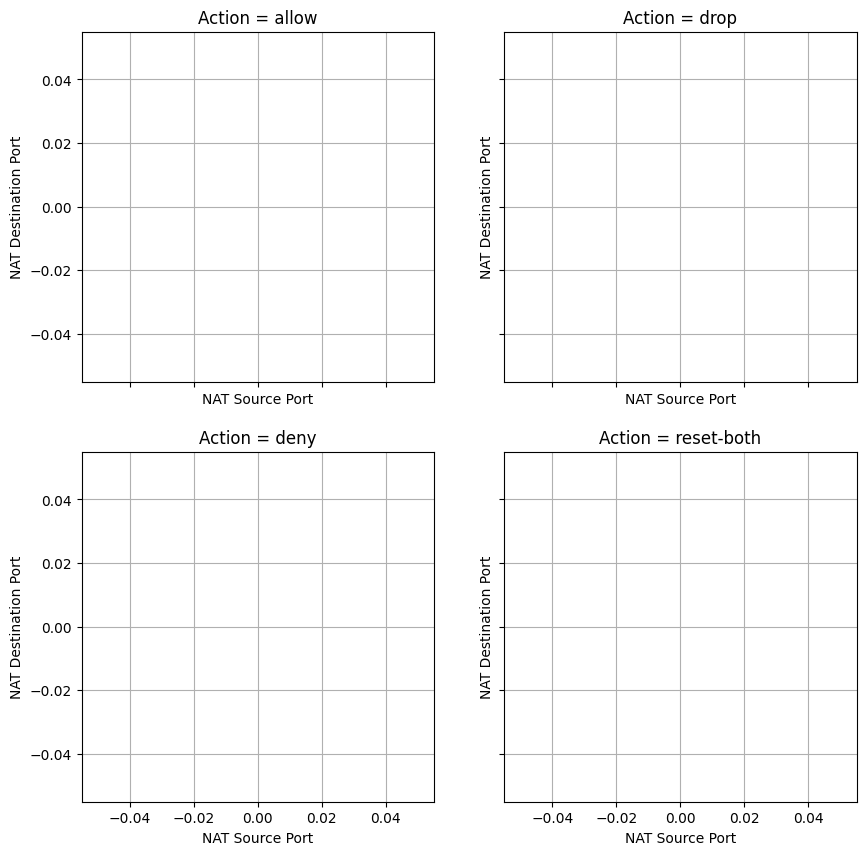

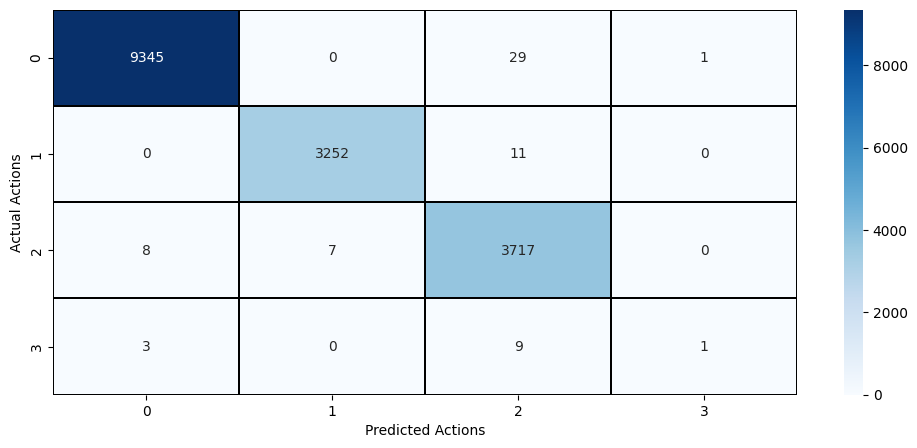

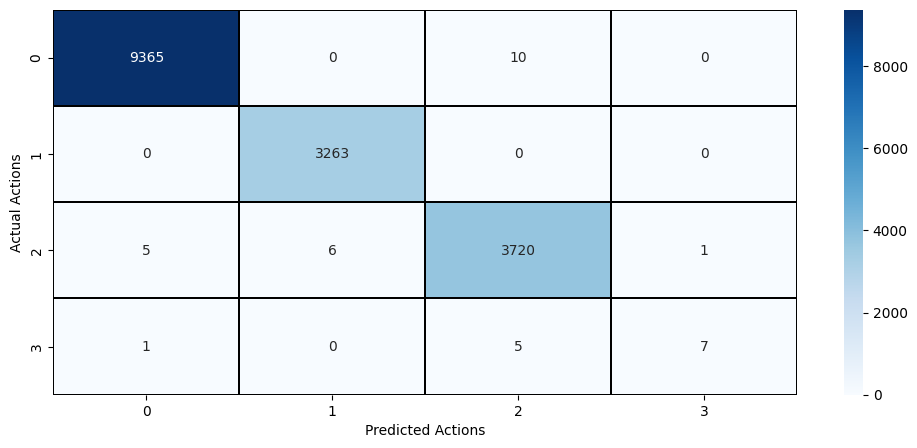

___________________________________________________________________________________________________________________________________________________________________________________________
___________________________________________________________________________________________________________________________________________________________________________________________


'\nIn confusion matrix ::\n* 0 - Allow -> 1\n* 1 - Drop -> 2\n* 2 - Deny -> 3\n* 3 - Reset-both -> 4\n'

In [ ]:
"""
*Title :: Internet Firewall Action Prediction
*
*Dataset Source :: 'https://archive.ics.uci.edu/ml/datasets/Internet+Firewall+Data'
"""

import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#------------------------------------------------------------------------
print("___________________________________________________________________________________________________________________________________________________________________________________________")
print("|--------------------------------------------------------------------------------------Initial Code--------------------------------------------------------------------------------------~|")


# Reading the Dataset .csv file and analyzing the dataset
df = pd.read_csv("Internet_Project_Data.csv")

# Checking data is correctly read or not
print(df.head())

# Checking the data information to find is there any missing data
print(df.info())

# Finding the shape of dataset
print(df.shape)

# Finding  the percentage of Action/Target and Plotting the count of each Action/Target in the dataset given
print('Percentages: of each Action')
print(df.Action.value_counts(normalize=True))

sns.countplot(df['Action'],label="Count")
plt.savefig('Action_Count.png')


num_features = ['Bytes', 'Bytes Sent', 'Bytes Received', 'Packets', 'Elapsed Time (sec)']

# Understanding the range of values in numerical features with the help of box plots
# This function is to get input for box plot
def num_trafo(x):
    return np.log10(1+x)

for f in num_features:
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(11,7), sharex=True)
    ax1.hist(num_trafo(df[f]), bins=20)
    ax1.grid()
    ax1.set_title('Feature: ' + f + ' - trafo [log_10(1+x)]')
    ax2.boxplot(num_trafo(df[f]), vert=False)
    ax2.grid()
    ax2.set_title('Feature: ' + f + ' - trafo [log_10(1+x)]')
    plt.savefig(f)

# Understanding the range of values in Categorical Features
cat_features = ['Source Port', 'Destination Port', 'NAT Source Port', 'NAT Destination Port']

for f in cat_features:
    print('Feature:', f)
    print(df[f].value_counts()[0:10])
    print()

# Understanding the speard of values of Categorical Features with respect to Actions
# This is done by considering only some of top values in each feature
for f in cat_features:
    top10_levels = df[f].value_counts()[0:10].index.to_list()
    df_temp = df[df[f].isin(top10_levels)]
    ctab = pd.crosstab(df_temp.Action, df_temp[f])
    print('Feature:' + f + ' - Top 10 levels only')
    plt.figure(figsize=(12,5))
    sns.heatmap(ctab, annot=True, fmt='d', cmap='Blues', linecolor='black', linewidths=0.1)
    plt.savefig(f)


# Plotting the scatter plots between Source port and Destination Port
# Against each Action
xx = 'Source Port'
yy = 'Destination Port'

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10,10))

df_temp = df[df.Action==1]
axs[0,0].scatter(df_temp[xx], df_temp[yy], alpha=0.05)
axs[0,0].set_title('Action = allow')
axs[0,0].set_xlabel(xx)
axs[0,0].set_ylabel(yy)
axs[0,0].grid()

df_temp = df[df.Action==2]
axs[0,1].scatter(df_temp[xx], df_temp[yy], alpha=0.05)
axs[0,1].set_title('Action = drop')
axs[0,1].set_xlabel(xx)
axs[0,1].set_ylabel(yy)
axs[0,1].grid()

df_temp = df[df.Action==3]
axs[1,0].scatter(df_temp[xx], df_temp[yy], alpha=0.5)
axs[1,0].set_title('Action = deny')
axs[1,0].set_xlabel(xx)
axs[1,0].set_ylabel(yy)
axs[1,0].grid()

df_temp = df[df.Action==4]
axs[1,1].scatter(df_temp[xx], df_temp[yy], alpha=0.5)
axs[1,1].set_title('Action = reset-both')
axs[1,1].set_xlabel(xx)
axs[1,1].set_ylabel(yy)
axs[1,1].grid()

plt.savefig(xx+'_'+yy)

# Plotting the scatter plots between NAT Source port and NAT Destination Port
# Against each Action
xx = 'NAT Source Port'
yy = 'NAT Destination Port'

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10,10))

df_temp = df[df.Action==1]
axs[0,0].scatter(df_temp[xx], df_temp[yy], alpha=0.05)
axs[0,0].set_title('Action = allow')
axs[0,0].set_xlabel(xx)
axs[0,0].set_ylabel(yy)
axs[0,0].grid()

df_temp = df[df.Action==2]
axs[0,1].scatter(df_temp[xx], df_temp[yy], alpha=0.5)
axs[0,1].set_title('Action = drop')
axs[0,1].set_xlabel(xx)
axs[0,1].set_ylabel(yy)
axs[0,1].grid()

df_temp = df[df.Action==3]
axs[1,0].scatter(df_temp[xx], df_temp[yy], alpha=0.5)
axs[1,0].set_title('Action = deny')
axs[1,0].set_xlabel(xx)
axs[1,0].set_ylabel(yy)
axs[1,0].grid()

df_temp = df[df.Action==4]
axs[1,1].scatter(df_temp[xx], df_temp[yy], alpha=0.5)
axs[1,1].set_title('Action = reset-both')
axs[1,1].set_xlabel(xx)
axs[1,1].set_ylabel(yy)
axs[1,1].grid()

plt.savefig(xx+'_'+yy)


#Creating the dependent variable class
factor = pd.factorize(df['Action'])
df.Action = factor[0]
definitions = factor[1]
print(df.Action.head())
print(definitions)

features = ['Source Port', 'Destination Port', 'NAT Source Port', 'NAT Destination Port']
X = df[features]
y = df['Action']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 21)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fitting Random Forest Classification to the Training set
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
confusion = pd.crosstab(y_test, y_pred, rownames=['Actual Actions'], colnames=['Predicted Actions'])
plt.figure(figsize=(12,5))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', linecolor='black', linewidths=0.1)
plt.savefig('Initial_ConfusionMat.png')

# finding accuracy percentage
Con_mat = np.sum(confusion)
predictions = [0, 1, 2, 3]
Con_pred = np.sum(Con_mat[predictions])
Con_correct = confusion[0][0] + confusion[1][1] + confusion[2][2] + confusion[3][3]
accuracy1 = (Con_correct/Con_pred)*100
print()
from sklearn.model_selection import cross_val_score

names = ['Source Port', 'Destination Port', 'NAT Source Port', 'NAT Destination Port', 'Bytes', 'Bytes Sent', 'Bytes Received', 'Packets', 'Elapsed Time (sec)', 'Action']

clf = RandomForestClassifier(n_estimators = 50, max_depth = 4)

X = df[names]
y = df['Action']

scores = []
num_features = len(X.columns)
for i in range(num_features):
    col = X.columns[i]
    score = np.mean(cross_val_score(clf, X[col].values.reshape(-1,1), y, cv=10))
    scores.append((int(score*100), col))

print("Printing all the ranks in sorted order :: ")
print(sorted(scores, reverse = True))
print()

scores = sorted(scores, reverse = True)

features_from_ranks = []

print("The 5 best features selected by this method are :")
for i in range(5):
    features_from_ranks.append(scores[i+1][1])
    print(scores[i+1][1])
print()

#Creating the dependent variable class
factor = pd.factorize(df['Action'])
df.Action = factor[0]
definitions = factor[1]
print(df.Action.head())
print(definitions)

X = df[features_from_ranks]
y = df['Action']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 21)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fitting Random Forest Classification to the Training set
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
confusion = pd.crosstab(y_test, y_pred, rownames=['Actual Actions'], colnames=['Predicted Actions'])
plt.figure(figsize=(12,5))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', linecolor='black', linewidths=0.1)
plt.savefig('Updated_ConfusionMat.png')

# finding accuracy percentage
Con_mat = np.sum(confusion)
predictions = [0, 1, 2, 3]
Con_pred = np.sum(Con_mat[predictions])
Con_correct = confusion[0][0] + confusion[1][1] + confusion[2][2] + confusion[3][3]
accuracy2 = (Con_correct/Con_pred)*100

print()
print("___________________________________________________________________________________________________________________________________________________________________________________________")
print(' Accuracy Percentage for test data by Random Forest model is :: '+str(accuracy1)+'%')
print("___________________________________________________________________________________________________________________________________________________________________________________________")
print()

print()
print("___________________________________________________________________________________________________________________________________________________________________________________________")
print(' Accuracy Percentage for test data by Random Forest model after Using Ranking for feature selection :: '+str(accuracy2)+'%')
print("___________________________________________________________________________________________________________________________________________________________________________________________")
print()
print(classification_report(y_test, y_pred))
plt.show()
print("___________________________________________________________________________________________________________________________________________________________________________________________")
print("___________________________________________________________________________________________________________________________________________________________________________________________")

'''
In confusion matrix ::
* 0 - Allow -> 1
* 1 - Drop -> 2
* 2 - Deny -> 3
* 3 - Reset-both -> 4
'''
